In [153]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = 'starry_night.jpg'

In [154]:
def bgr2rgb(image):
  height, width, _ = image.shape
  rgb = image.copy()
  for i in range(0, height):
    for j in range(0, width):
      #swap channels
      rgb[i, j, 0], rgb[i, j, 2] = rgb[i, j, 2], rgb[i, j, 0]
  return rgb

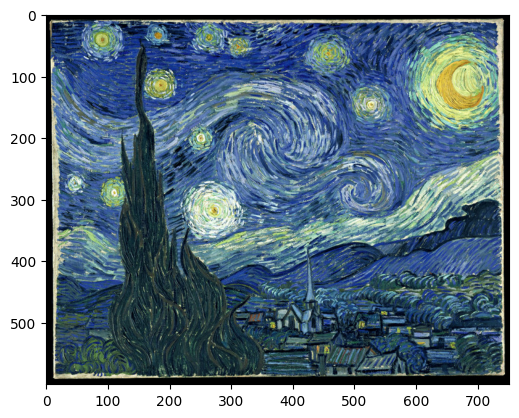

In [155]:
#check starry_night
image = cv2.imread(image_path)
plt.imshow(bgr2rgb(image))

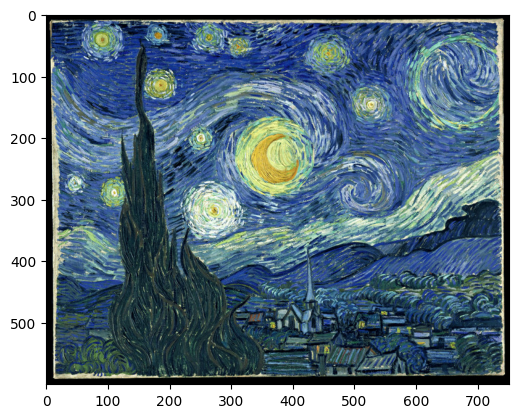

In [165]:
image = cv2.imread(image_path)

#coords
moon = np.array([670, 110])
whirl = np.array([370, 230])
diff = moon - whirl

#white pic (mask)
mask = np.ones_like(image) * 255

#moon
roi1 = cv2.circle(np.zeros(image.shape[:2], np.uint8), (670, 110), 65, 255, cv2.FILLED)
mask1 = cv2.bitwise_and(mask, image, mask=roi1) + cv2.bitwise_and(mask, mask, mask=~roi1)
mask1[np.where((mask1==[255,255,255]).all(axis=2))] = [0,0,0]

#"funnel"
roi2 = cv2.circle(np.zeros(image.shape[:2], np.uint8), (370, 230), 65, 255, cv2.FILLED)
mask2 = cv2.bitwise_and(mask, image, mask=roi2) + cv2.bitwise_and(mask, mask, mask=~roi2)
mask2[np.where((mask2==[255,255,255]).all(axis=2))] = [0,0,0]

#swap
mask1 = cv2.warpAffine(mask1, np.float32([[1, 0, -diff[0]], [0, 1, -diff[1]]]), (mask1.shape[1], mask1.shape[0]))
mask2 = cv2.warpAffine(mask2, np.float32([[1, 0, diff[0]], [0, 1, diff[1]]]), (mask2.shape[1], mask2.shape[0]))

#modify
image[np.where((mask1!=[0,0,0]).all(axis=2))] = mask1[np.where((mask1!=[0,0,0]).all(axis=2))]
image[np.where((mask2!=[0,0,0]).all(axis=2))] = mask2[np.where((mask2!=[0,0,0]).all(axis=2))]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

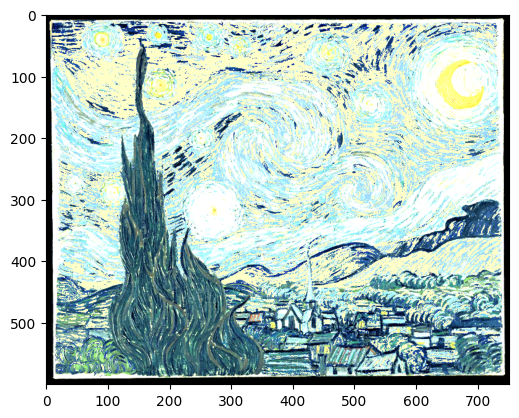

In [166]:
image = cv2.imread(image_path)

#dark_blue
mask = cv2.inRange(image, np.array([100,0,0]), np.array([255,100,100]))
#change with light_yellow
image[mask>0] = (100,200,200)
#split bt channels
b, g, r = cv2.split(image.astype('uint64'))
#more brightness for channels
b *= 2
g *= 2
r *= 2
b[b > 255] = 255
g[g > 255] = 255
r[r > 255] = 255
image = cv2.merge([b, g, r])

plt.imshow(cv2.cvtColor(image.astype('uint8'), cv2.COLOR_BGR2RGB))